# Exploratory Data Analysis
## 13
Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.

**ANSWER**



(1) 

a.Which country have the most suicide rate?
    
b.How is the suicide rate of U.S. changed over times?
    
c.Does suicide rate of U.S. differs for male and female?
    
d.Does suicide rate of U.S. differs for different age groups?

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
suicide = pd.read_csv("master.csv")

(2)

This dataset is from kaggle dataset. It was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum. It contains the following variables: country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year (Human Development Index), gdp_for_year, gdp_per_capita, generation. Below is a summary of the numerical variables in the dataset.

In [2]:
pd.DataFrame.describe(suicide)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


(3)

It does have missing values in the HDI for year colume. Since HDI is not of our interest, we do not neet to worry about this variable. Also, after looking at the summary table, we can find that the maximum number of suicides is very high. This may due to the fact that the population for that count is also high.

(4)

Below is the top10 high suicide country. Their high suicide rate may relate to their low gdp per capita.

Text(0.5, 1.0, 'suicide rate per country')

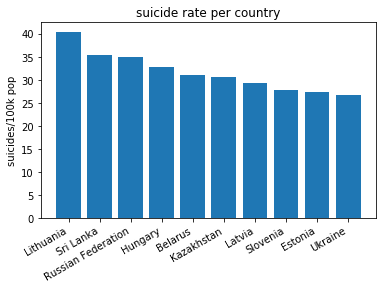

In [3]:
top10_sui_country = suicide.groupby("country")["suicides/100k pop", "gdp_per_capita($)"].mean().nlargest(10, "suicides/100k pop")
fig, ax = plt.subplots()
ax.bar(top10_sui_country["suicides/100k pop"].index, top10_sui_country["suicides/100k pop"])
fig.autofmt_xdate()
ax.set_ylabel("suicides/100k pop")
ax.set_title("suicide rate per country")

As we can see from the folowing table, these countries' GDP per capita are all lower than the average GDP per capita (16866.46 dollors) except Slovenia.

In [4]:
from IPython.display import display
display(top10_sui_country)

,suicides/100k pop,gdp_per_capita($)
country,,
Lithuania,40.415573,9280.549618
Sri Lanka,35.295152,904.272727
Russian Federation,34.892377,6518.814815
Hungary,32.761516,9370.051613
Belarus,31.075913,3333.904762
Kazakhstan,30.511282,5329.115385
Latvia,29.259325,8961.095238
Slovenia,27.827857,18642.238095
Estonia,27.276905,11376.095238


From the line plot, we can see that the suicide rate droped from 1985 until 2000. This was because there was a economic development at the time. Then the suicide rate started to go up, which is because people's living pressure increases. For example, the employment rate is lower than before.

Text(0.5, 1.0, 'suicide rate per year')

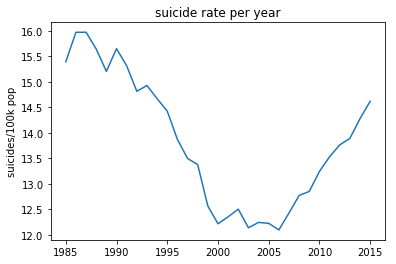

In [5]:
us_sui = suicide[suicide["country"] == "United States"]
top10_sui_year_us = us_sui.groupby("year")["suicides/100k pop", "gdp_per_capita($)"].mean()

fig, ax = plt.subplots()
ax.plot(top10_sui_year_us["suicides/100k pop"].index, top10_sui_year_us["suicides/100k pop"])
ax.set_ylabel("suicides/100k pop")
ax.set_title("suicide rate per year")

The bar plot below show that the suicide rates are higher for male than female in U.S.

Text(0.5, 1.0, 'suicide rate grouped by sex')

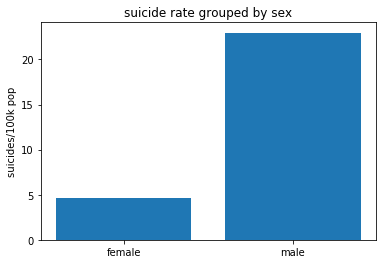

In [6]:
sex_sui_us = us_sui.groupby("sex")["suicides/100k pop"].mean()

fig, ax = plt.subplots()
ax.bar(sex_sui_us.index, sex_sui_us)
ax.set_ylabel("suicides/100k pop")
ax.set_title("suicide rate grouped by sex")

The following bar plot shows that the suicide rates are higher for older people. This may due to the fact that older people may feel more lonely. Also, the values of varable age were in different scale. For the first three bars, the range for each bar is 10. But for the later bars, the range is longer than 10.

Text(0.5, 1.0, 'suicide rate grouped by age')

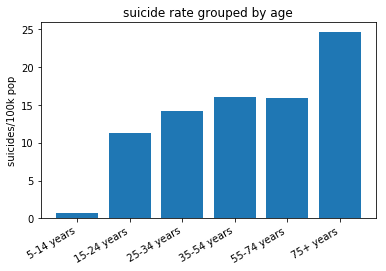

In [7]:
age_sui_us = us_sui.groupby("age")["suicides/100k pop"].mean()
age_sui_us = age_sui_us.reindex(index = ['5-14 years','15-24 years','25-34 years', "35-54 years", "55-74 years", "75+ years"])
fig, ax = plt.subplots()
ax.bar(age_sui_us.index, age_sui_us)
fig.autofmt_xdate()
ax.set_ylabel("suicides/100k pop")
ax.set_title("suicide rate grouped by age")

(5) 
    
The suicide rates are higher for the country which has lower GDP for capita. Also the suicide rates are also affected by people's sex and age. In particular, for U.S. people, males and older people have higher suicide rates.

Suicide is an serious problem. If we could identify which variables are associated the suicide, goverment or charity could give the people who have those variables more cares. As a result, the suicide rate could drop significantly.

(6) https://github.com/chrimiway/machine-learning-course